## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,silhouette_samples,classification_report
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

## Working with csv

In [ ]:
path="/content/Customer Data.csv"
df=pd.read_csv(path)

In [ ]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2192,C12261,2586.357487,1.000000,0.00,0.00,0.00,256.100571,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,658.613870,582.879568,0.000000,12
7219,C17414,4995.526188,1.000000,0.00,0.00,0.00,5807.528817,0.000000,0.000000,0.000000,0.416667,13,0,6000.0,1083.891126,1437.869477,0.000000,12
456,C10474,123.394089,0.909091,1450.68,0.00,1450.68,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,6000.0,1583.421932,137.826186,0.454545,12
3694,C13798,954.260731,1.000000,611.08,567.32,43.76,0.000000,0.833333,0.666667,0.083333,0.000000,0,14,3500.0,795.002019,189.893901,0.000000,12
7383,C17584,158.512412,0.454545,713.64,713.64,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,3000.0,1121.322787,96.145734,0.000000,12


## EDA

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['CUST_ID'],inplace=True,axis=1)

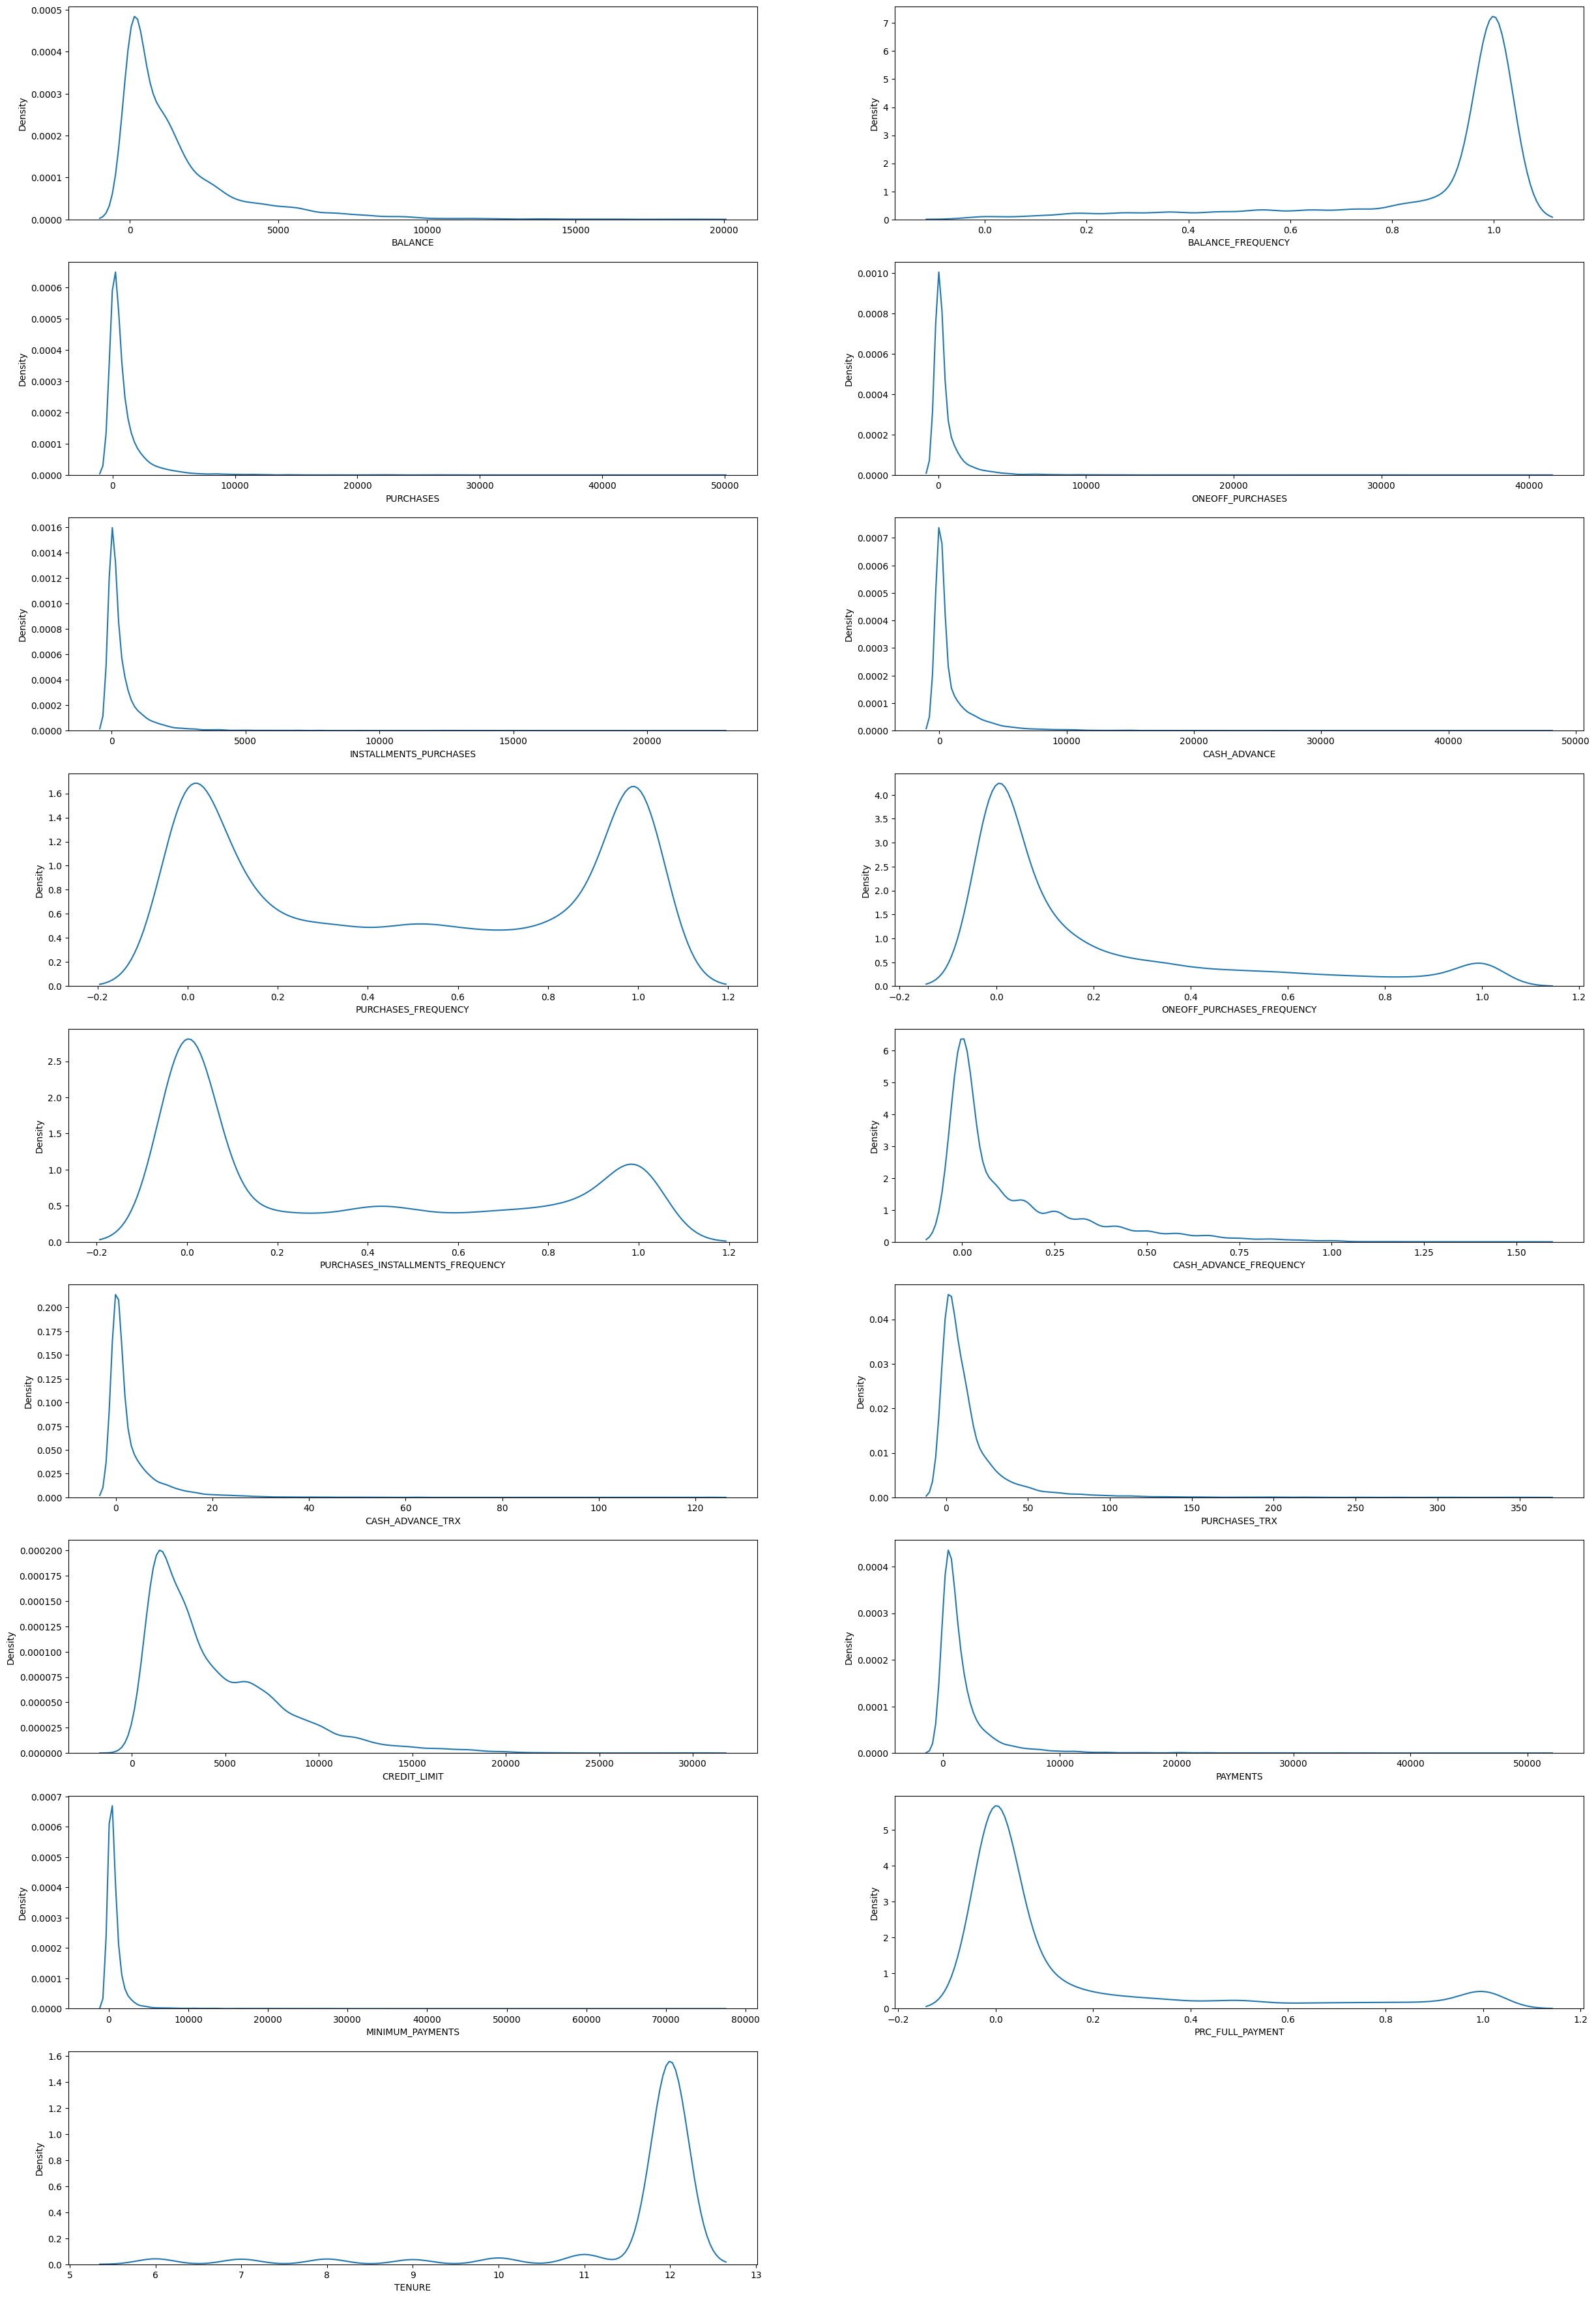

In [ ]:
plt.figure(figsize=(30,45))
for i,column in enumerate(df.columns):
  if df[column].dtype !='object':
    ax=plt.subplot(9,2,i+1)
    sns.kdeplot(df[column],ax=ax)
    plt.xlabel(column)

<Axes: >

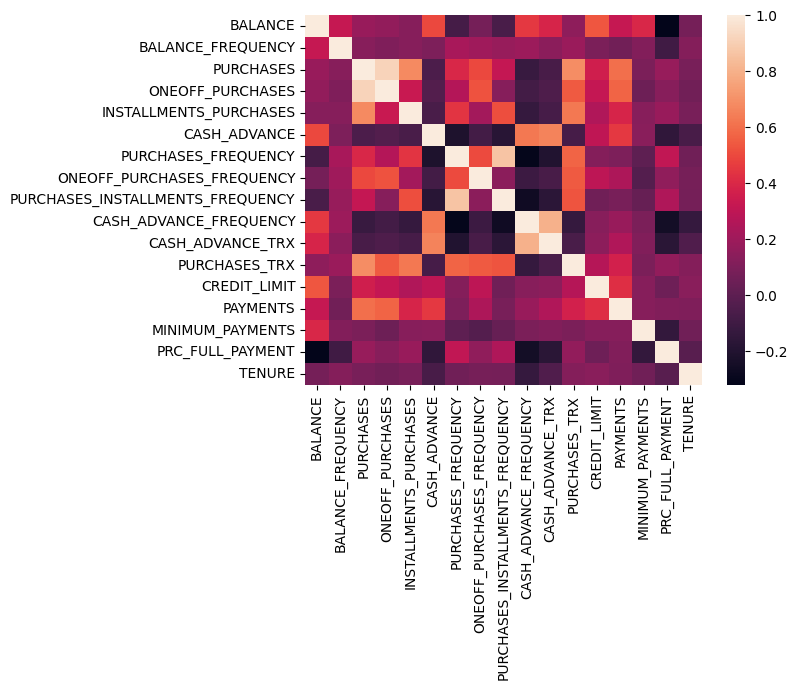

In [ ]:
sns.heatmap(df.corr())

In [ ]:
scalar=StandardScaler()
scaled_df=scalar.fit_transform(df)

## Dimensionality reduction

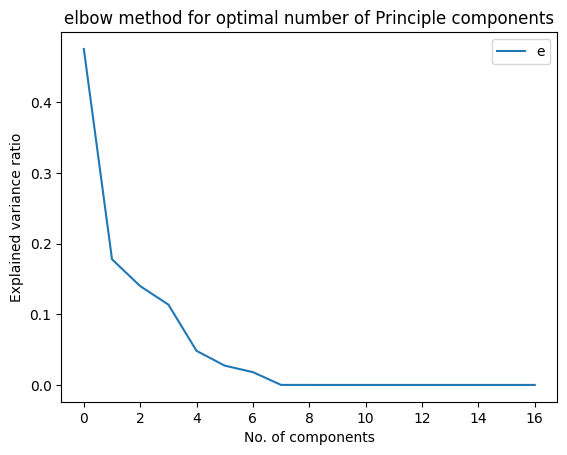

In [ ]:
#finding optimal number of principle components
pca=PCA()
pca.fit(df)
plt.title("elbow method for optimal number of Principle components")
plt.plot(pca.explained_variance_ratio_)
plt.legend("explained variance")
plt.xlabel("No. of components")
plt.ylabel("Explained variance ratio")
plt.show()

In [ ]:
threshold = 0.95
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1

In [ ]:
optimal_components

5

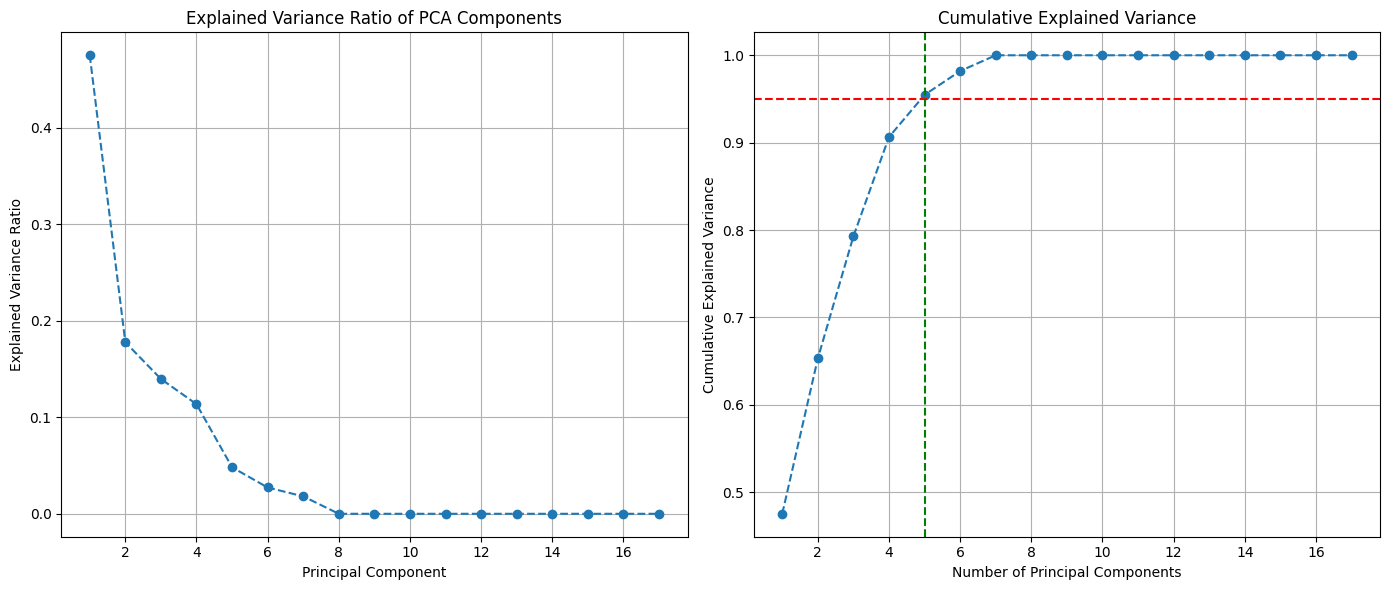

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Plot the cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'Optimal Components: {optimal_components}')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
pca=PCA(5)
pca_df=pca.fit_transform(scaled_df)

In [ ]:
pca_df=pd.DataFrame(data=pca_df,columns=['pca1','pca2','pca3','pca4','pca5',])

In [ ]:
pca_df

,pca1,pca2,pca3,pca4,pca5
0,-1.682220,-1.076451,0.488507,0.665551,0.018224
1,-1.138295,2.506477,0.601212,-0.120437,0.605803
2,0.969684,-0.383520,0.102371,1.209263,-2.172588
3,-0.873628,0.043166,1.460167,1.151980,0.295632
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039
...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727434,0.268859
8946,-0.564369,-1.639123,-1.290238,-1.860553,0.187103
8947,-0.926204,-1.810786,-0.474723,-2.280240,0.386552
8948,-2.336552,-0.657966,0.974725,-1.861277,0.069780


## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

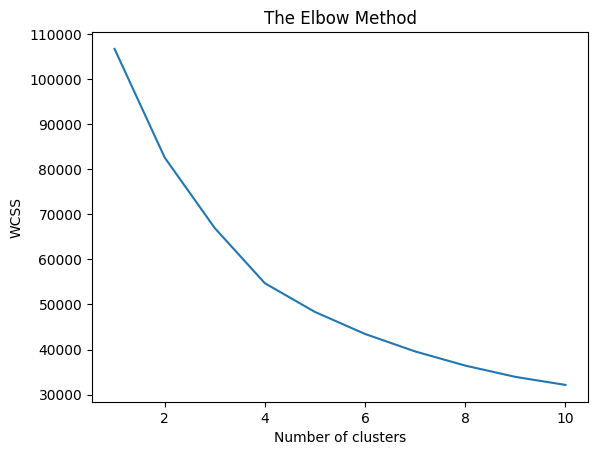

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
type(y_kmeans)

numpy.ndarray

In [ ]:
df.shape

(8950, 17)

In [ ]:
df['segments']=y_kmeans

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,segments
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Axes: xlabel='segments'>

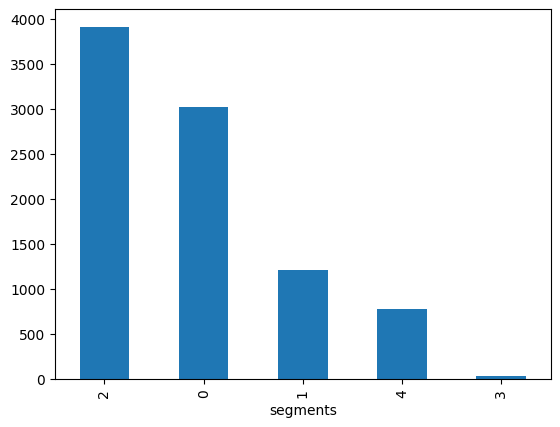

In [ ]:
df['segments'].value_counts().plot(kind='bar')

In [ ]:
len(df.columns)

18

In [ ]:
df_segments=[df[df['segments']==i] for i in range(5)]

## Classification

In [ ]:
X=df.copy()
y=X.pop('segments')

In [1]:
y

NameError: name 'y' is not defined

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
accuracies=cross_val_score(estimator=dt,X=X_train,y=y_train,cv=10)

In [ ]:
print(f"mean accuracy {accuracies.mean()*100}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(100)

In [ ]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
accuracies_rf=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10)
print(f"mean accuracy {accuracies_rf.mean()*100}")

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(f"Best Accuracy: {best_accuracy * 100} ")
print("Best Parameters:", best_parameters)